<a href="https://colab.research.google.com/github/akinahomwabella/Akinahom-Portfolio/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

# Check if the downloaded path exists and handle the dataset
if os.path.exists(path):
    print(f"Dataset downloaded to: {path}")

    # Find the training and validation CSV files
    training_file = os.path.join(path, "twitter_training.csv")
    validation_file = os.path.join(path, "twitter_validation.csv")

    # Define custom column names since the dataset has no header
    column_names = ["Tweet ID", "entity", "sentiment", "Tweet content"]

    # Read the CSV files into DataFrames
    if os.path.exists(training_file) and os.path.exists(validation_file):
        training_data = pd.read_csv(training_file, header=None, names=column_names)
        validation_data = pd.read_csv(validation_file, header=None, names=column_names)
        print("Training and validation datasets loaded.")
    else:
        print("Error: twitter_training.csv or twitter_validation.csv not found in the downloaded dataset.")
else:
    print("Failed to download the dataset.")

# Encoding the 'entity' and 'sentiment' columns
encoder_entity = LabelEncoder()
encoder_sentiment = LabelEncoder()

# Fit on the training data and transform both datasets
training_data['entity_encoded'] = encoder_entity.fit_transform(training_data['entity'])
validation_data['entity_encoded'] = encoder_entity.transform(validation_data['entity'])

training_data['sentiment_encoded'] = encoder_sentiment.fit_transform(training_data['sentiment'])
validation_data['sentiment_encoded'] = encoder_sentiment.transform(validation_data['sentiment'])

# Define interpolation functions
def linear_interpolation(data, column):
    return data[column].interpolate(method='linear').bfill().ffill()

def spline_interpolation(data, column, order=3):
    return data[column].interpolate(method='spline', order=order).bfill().ffill()

def knn_imputation(data, column, n_neighbors=5):
    temp_data = data.copy()
    imputer = KNNImputer(n_neighbors=n_neighbors)
    temp_data[[column]] = imputer.fit_transform(temp_data[[column]])
    return temp_data[column]

# Step 2: Check for missing values
print("Missing values in training data:")
print(training_data.isnull().sum())

print("\nMissing values in validation data:")
print(validation_data.isnull().sum())

# Step 3: Apply interpolation
columns_to_interpolate = ['Tweet ID', 'entity_encoded', 'sentiment_encoded']

# Apply to training data
for column in columns_to_interpolate:
    if column in training_data.columns:
        training_data[f'{column}_linear'] = linear_interpolation(training_data, column)
        training_data[f'{column}_spline'] = spline_interpolation(training_data, column)
        training_data[f'{column}_knn'] = knn_imputation(training_data, column)

# Apply to validation data
for column in columns_to_interpolate:
    if column in validation_data.columns:
        validation_data[f'{column}_linear'] = linear_interpolation(validation_data, column)
        validation_data[f'{column}_spline'] = spline_interpolation(validation_data, column)
        validation_data[f'{column}_knn'] = knn_imputation(validation_data, column)

# Step 4: Save the cleaned datasets
training_data.to_csv('training_cleaned.csv', index=False)
validation_data.to_csv('validation_cleaned.csv', index=False)

print("\nCleaned datasets saved as 'training_cleaned.csv' and 'validation_cleaned.csv'.")


Dataset downloaded to: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2
Training and validation datasets loaded.
Missing values in training data:
Tweet ID               0
entity                 0
sentiment              0
Tweet content        686
entity_encoded         0
sentiment_encoded      0
dtype: int64

Missing values in validation data:
Tweet ID             0
entity               0
sentiment            0
Tweet content        0
entity_encoded       0
sentiment_encoded    0
dtype: int64

Cleaned datasets saved as 'training_cleaned.csv' and 'validation_cleaned.csv'.



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       172
           1       1.00      0.00      0.00       266
           2       1.00      0.00      0.00       285
           3       0.28      1.00      0.43       277
           4       1.00      1.00      1.00         1

    accuracy                           0.28      1001
   macro avg       0.86      0.40      0.29      1001
weighted avg       0.80      0.28      0.12      1001



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       172
           1       1.00      0.00      0.00       266
           2       1.00      0.00      0.00       285
           3       0.28      1.00      0.43       277
           4       1.00      1.00      1.00         1

    accuracy                           0.28      1001
   macro avg       0.86      0.40      0.29      1001
weighted avg       0.80      0.28      0.12      1001

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1868/1868 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2861 - loss: 1.4170 - val_accuracy: 0.3515 - val_loss: 1.3433
Epoch 2/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2843 - loss: 1.3776 - val_accuracy: 0.3515 - val_loss: 1.3533
Epoch 3/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2844 - loss: 1.3798 - val_accuracy: 0.3515 - val_loss: 1.3485
Epoch 4/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2795 - loss: 1.4080 - val_accuracy: 0.2515 - val_loss: 1.3563
Epoch 5/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.2928 - loss: 1.3814 - val_accuracy: 0.3515 - val_loss: 1.3525
Epoch 6/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2904 - loss: 1.3854 - val_accuracy: 0.3515 - val_loss: 1.3492
Epoch 7/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2895 - loss: 1.3722 - val_accuracy: 0.3515 - val_loss: 1.3505
Epoch 8/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2828 - loss: 1.3745 - val_acc

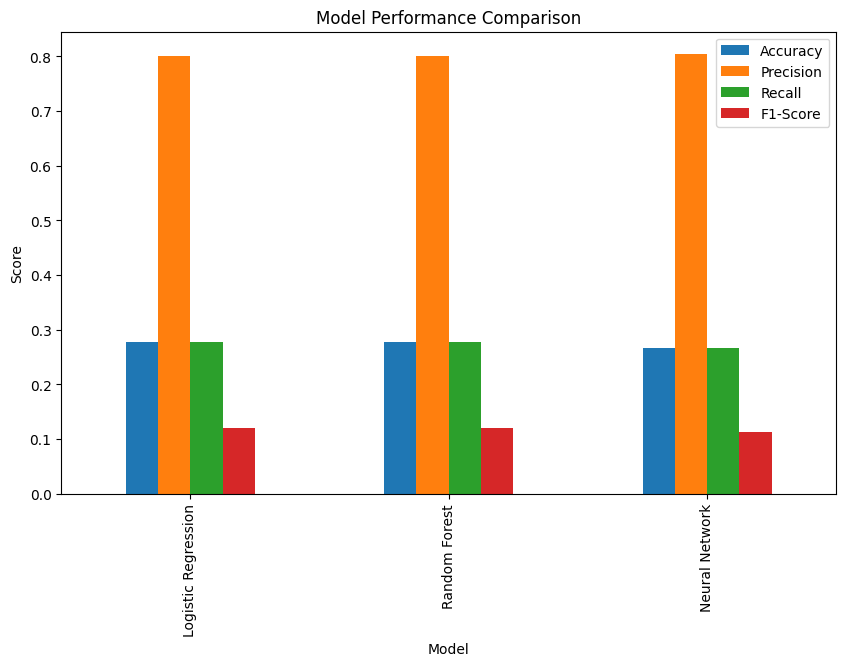

In [36]:
# Import required libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import joblib

# Load the datasets
training_data = pd.read_csv(
    'training_cleaned.csv',
    header=None,
    names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'],
    dtype={'Tweet ID': str, 'entity': str, 'sentiment': str, 'Tweet content': str},
    low_memory=False
)
validation_data = pd.read_csv(
    'validation_cleaned.csv',
    header=None,
    names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'],
    dtype={'Tweet ID': str, 'entity': str, 'sentiment': str, 'Tweet content': str},
    low_memory=False
)

# Preprocess Text
def preprocess_text(text):
    import re
    if pd.isna(text):
        return ""  # Handle NaN values
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

training_data['Tweet content'] = training_data['Tweet content'].apply(preprocess_text)
validation_data['Tweet content'] = validation_data['Tweet content'].apply(preprocess_text)

# Extract Sentiment Features
def compute_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

training_data['polarity'], training_data['subjectivity'] = zip(
    *training_data['Tweet content'].apply(compute_sentiment)
)
validation_data['polarity'], validation_data['subjectivity'] = zip(
    *validation_data['Tweet content'].apply(compute_sentiment)
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
tfidf_train = tfidf_vectorizer.fit_transform(training_data['Tweet content'].fillna(''))
tfidf_val = tfidf_vectorizer.transform(validation_data['Tweet content'].fillna(''))

# Create Additional Features
training_data['tweet_length'] = training_data['Tweet content'].str.len()
training_data['num_hashtags'] = training_data['Tweet content'].str.count('#')
validation_data['tweet_length'] = validation_data['Tweet content'].str.len()
validation_data['num_hashtags'] = validation_data['Tweet content'].str.count('#')

# Combine Features
feature_columns = ['polarity', 'subjectivity', 'tweet_length', 'num_hashtags']
X_train_features = training_data[feature_columns]
X_val_features = validation_data[feature_columns]

X_train = np.hstack([X_train_features.values, tfidf_train.toarray()])
X_val = np.hstack([X_val_features.values, tfidf_val.toarray()])

# Encode Target Labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(training_data['sentiment'])
y_val = label_encoder.transform(validation_data['sentiment'])

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_val_scaled)

# Logistic Regression Metrics
print("\nLogistic Regression Performance:")
print(classification_report(y_val, lr_predictions, zero_division=1))

# Random Forest Model with Hyperparameter Tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid, cv=5, scoring='f1_weighted'
)
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_val_scaled)

# Random Forest Metrics
print("\nRandom Forest Performance:")
print(classification_report(y_val, rf_predictions, zero_division=1))

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
nn_loss, nn_accuracy = nn_model.evaluate(X_val_scaled, y_val)
nn_predictions = np.argmax(nn_model.predict(X_val_scaled), axis=1)

# Neural Network Metrics
print("\nNeural Network Performance:")
print(classification_report(y_val, nn_predictions, zero_division=1))

# Save Results and Models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_val, lr_predictions),
        accuracy_score(y_val, rf_predictions),
        nn_accuracy
    ],
    'Precision': [
        precision_score(y_val, lr_predictions, average='weighted', zero_division=1),
        precision_score(y_val, rf_predictions, average='weighted', zero_division=1),
        precision_score(y_val, nn_predictions, average='weighted', zero_division=1)
    ],
    'Recall': [
        recall_score(y_val, lr_predictions, average='weighted', zero_division=1),
        recall_score(y_val, rf_predictions, average='weighted', zero_division=1),
        recall_score(y_val, nn_predictions, average='weighted', zero_division=1)
    ],
    'F1-Score': [
        f1_score(y_val, lr_predictions, average='weighted', zero_division=1),
        f1_score(y_val, rf_predictions, average='weighted', zero_division=1),
        f1_score(y_val, nn_predictions, average='weighted', zero_division=1)
    ]
})

print("\nModel Performance Summary:")
print(results)

joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(best_rf_model, 'random_forest_model.pkl')
nn_model.save('neural_network_model.h5')

results.set_index('Model').plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison")
plt.ylabel("Score")
plt.show()
